In [7]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.stats import norm
import math
import statistics
from scipy.optimize import fsolve
##plt.rcParams['text.usetex'] = False
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
from gaussian_functions import *

In [8]:
#####################
##FIND Re VALUE FROM M STELLAR

# Structures of Dwarf Satellites of Milky Way-like Galaxies: Morphology, Scaling Relations, and Intrinsic Shapes
# Eq 5 section 3.5

def logRe_eq (logMstellar):
    a = 1.077
    b = 0.246
    logRe = a + b*logMstellar
    return logRe  #in pc

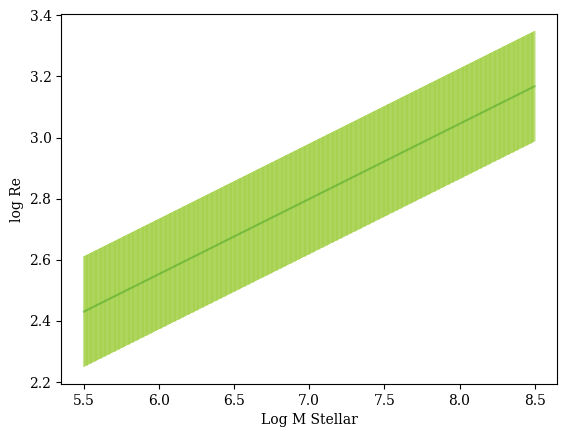

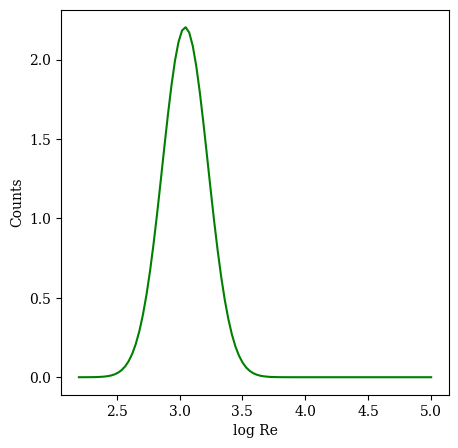

In [9]:
################################################
## Re
################################################

# Structures of Dwarf Satellites of Milky Way-like Galaxies: Morphology, Scaling Relations, and Intrinsic Shapes
# dwarves in mass range 5.5 < M < 8.5


## Plot of Re for range of Stellar values 
logMstellar = np.linspace(5.5, 8.5, 1000)
Re = logRe_eq(logMstellar)
sigmaRe = 0.181
plt.errorbar(logMstellar, Re, yerr = sigmaRe, color = 'green', ecolor = 'yellowgreen', alpha = 0.3)
plt.xlabel('Log M Stellar')
plt.ylabel('log Re')
plt.show


########## Plot Gaussian ##########
logMstellar = 8 
mu = logRe_eq(logMstellar)  ## mean value of Re (from paper) for a given stellar mass
logRe = np.linspace(2.2, 5, 100) # Generate x values ie Re values
gaus = Gaussian(logRe, mu, sigmaRe)  # Gaussian for list of Re values

# Plot the Gaussian function
plt.figure(figsize=(5,5))
plt.plot(logRe, gaus, 'g')
plt.xlabel('log Re')
plt.ylabel('Counts')
#plt.xticks(np.linspace(6, 13, 8))
plt.show()

# Sample Re

In [10]:
def Re_random_sample (logMstellar, n):
    mu = logRe_eq(logMstellar)
    sigma = 0.181  
    sample_Re = np.random.normal(mu, sigma, n)
    return sample_Re

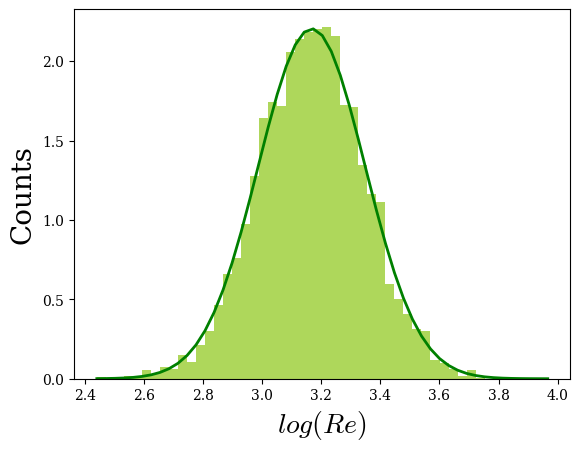

In [11]:
logMstellar = 8.5
n = 5000
sample = Re_random_sample (logMstellar, n)
count, bins, ignoored = plt.hist(sample, 50, density=True, 
                                 color = 'yellowgreen', alpha=0.8)
muRe = logRe_eq(logMstellar) 
sigma_Re = 0.181
plt.plot(bins, Gaussian(bins, muRe, sigmaRe), linewidth=2, color='g')
plt.xlabel('$log(Re)$', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.show()

## Debugging

10000 10000


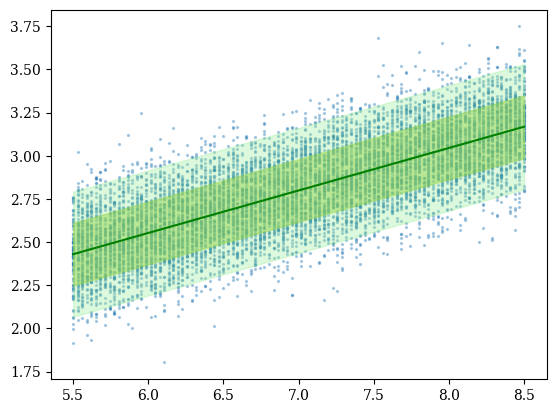

In [34]:
logMstellars = np.linspace(5.5, 8.5, 100)
n = 100

R_es =[]
Mstellars = []
for logMstellar in logMstellars:
    R_es.extend(Re_random_sample(logMstellar, n))  # Add the 100 samples to R_es
    Mstellars.extend([logMstellar] * n)  # Add the logMstellar value 100 times

print(len(R_es), len(Mstellars))
plt.scatter(Mstellars, R_es, alpha = 0.3, s = 2)



## Plot of Re for range of Stellar values 
logMstellar = np.linspace(5.5, 8.5, 1000)
Re = logRe_eq(logMstellar)
sigmaRe = 0.181
# plt.errorbar(logMstellar, Re, yerr = sigmaRe, color = 'green', ecolor = 'yellowgreen', alpha = 0.3)
# Plot the mean line
plt.plot(logMstellar, Re, color='green', label='Mean $R_e$')
# 1-sigma error band
plt.fill_between(logMstellar, Re - sigmaRe, Re + sigmaRe, color='yellowgreen', alpha=0.5, label='1$\sigma$ error')
# 2-sigma error band
plt.fill_between(logMstellar, Re - 2 * sigmaRe, Re + 2 * sigmaRe, color='lightgreen', alpha=0.3, label='2$\sigma$ error')


plt.show()

In [35]:
import numpy as np

# Function to calculate the percentage of values within 1 and 2 standard deviations
def calculate_percentage_within_std(samples):
    mean = np.mean(samples)
    std_dev = np.std(samples)

    # Calculate the bounds for 1 and 2 standard deviations
    lower_bound_1 = mean - std_dev
    upper_bound_1 = mean + std_dev
    lower_bound_2 = mean - 2 * std_dev
    upper_bound_2 = mean + 2 * std_dev

    # Calculate the percentage of samples within these bounds
    within_1_std = np.sum((samples >= lower_bound_1) & (samples <= upper_bound_1)) / len(samples) * 100
    within_2_std = np.sum((samples >= lower_bound_2) & (samples <= upper_bound_2)) / len(samples) * 100

    return within_1_std, within_2_std

# Calculate percentages

percent_within_1_std, percent_within_2_std = calculate_percentage_within_std(R_es)

print(f"Percentage of Re within 1 standard deviation: {percent_within_1_std:.2f}%")
print(f"Percentage of Re within 2 standard deviations: {percent_within_2_std:.2f}%")


Percentage of Re within 1 standard deviation: 65.85%
Percentage of Re within 2 standard deviations: 96.42%
